# Descriptive Statistics

In [1]:
import pandas as pd

In [2]:
# Load data

df = pd.read_csv("/Users/chathulachandiraweerasinghe/Downloads/Train Data.csv")

In [3]:
# Show first few rows

print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Temperature  Rainfall  Humidity  Pressure RainToday  RainTomorrow
0        18.15       0.6     9.375    4.9875        No             0
1        16.25       0.0     8.125    4.0625        No             0
2        24.90       1.0    12.950    6.9750        No             0
3        22.15       0.2    11.175    5.6875        No             0
4        17.20       0.0     8.600    4.3000        No             0


In [4]:
# Dataset shape

print("\nDataset shape:", df.shape)


Dataset shape: (98537, 6)


In [5]:
# Data types

print("\nColumn data types:")
print(df.dtypes)


Column data types:
Temperature     float64
Rainfall        float64
Humidity        float64
Pressure        float64
RainToday        object
RainTomorrow      int64
dtype: object


In [6]:
# Missing values

print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Temperature     0
Rainfall        0
Humidity        0
Pressure        0
RainToday       0
RainTomorrow    0
dtype: int64


In [7]:
# Descriptive statistics for numerical columns

print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Descriptive statistics for numerical columns:
        Temperature      Rainfall      Humidity      Pressure  RainTomorrow
count  98537.000000  98537.000000  98537.000000  98537.000000  98537.000000
mean      17.653627      2.353024     10.003325      6.178175      0.221978
std        6.317805      8.487866      5.315594      6.574099      0.415578
min       -5.150000      0.000000     -2.250000     -1.125000      0.000000
25%       12.900000      0.000000      7.025000      3.675000      0.000000
50%       17.300000      0.000000      9.375000      4.962500      0.000000
75%       22.300000      0.800000     12.000000      6.462500      0.000000
max       38.800000    371.000000    195.725000    283.312500      1.000000


In [8]:
# Descriptive statistics for categorical columns

print("\nDescriptive statistics for categorical columns:")
print(df.describe(include=['object']))


Descriptive statistics for categorical columns:
       RainToday
count      98537
unique         2
top           No
freq       76481


In [9]:
# Value counts for target variable (RainTomorrow)

if 'RainTomorrow' in df.columns:
    print("\nValue counts for RainTomorrow:")
    print(df['RainTomorrow'].value_counts())


Value counts for RainTomorrow:
RainTomorrow
0    76664
1    21873
Name: count, dtype: int64


# Exploratory Data Analysis & Visualization

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# 1. Missing Value

# Count missing values per column
missing_counts = df.isnull().sum()
print("Missing values per column:")
print(missing_counts)


Missing values per column:
Temperature     0
Rainfall        0
Humidity        0
Pressure        0
RainToday       0
RainTomorrow    0
dtype: int64


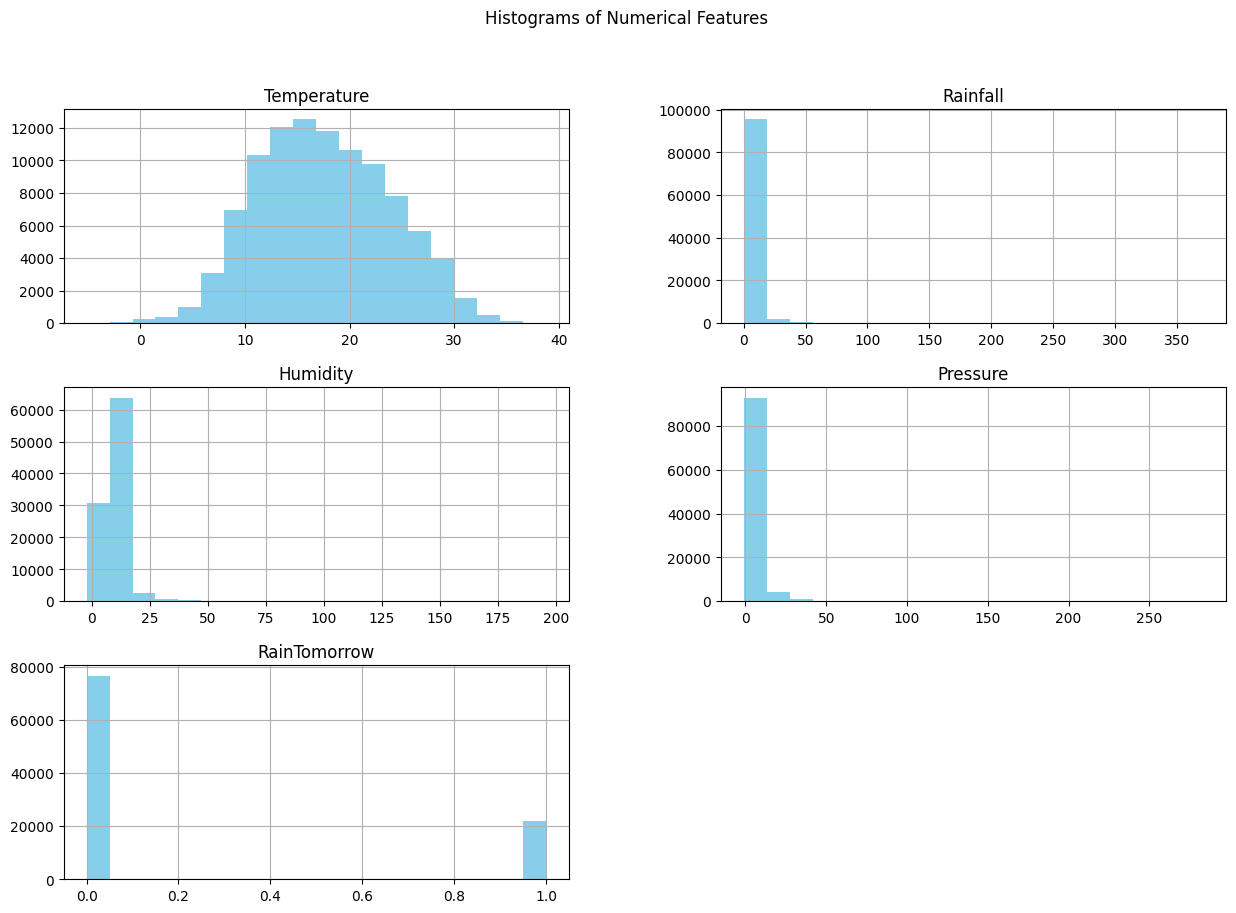

In [12]:
# 2. Distribution of Numerical Features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(figsize=(15, 10), bins=20, color='skyblue')
plt.suptitle('Histograms of Numerical Features')
plt.show()

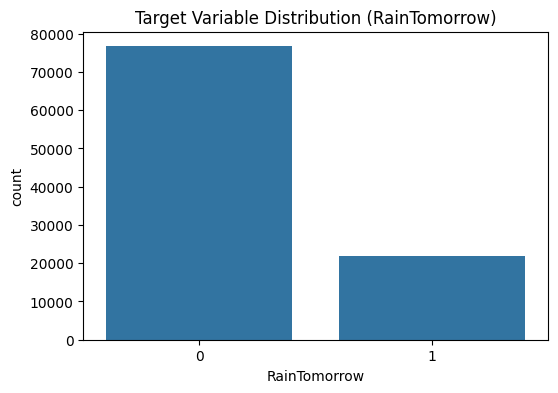

In [13]:
# 3. Target Variable Distribution
if 'RainTomorrow' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='RainTomorrow', data=df)
    plt.title('Target Variable Distribution (RainTomorrow)')
    plt.show()

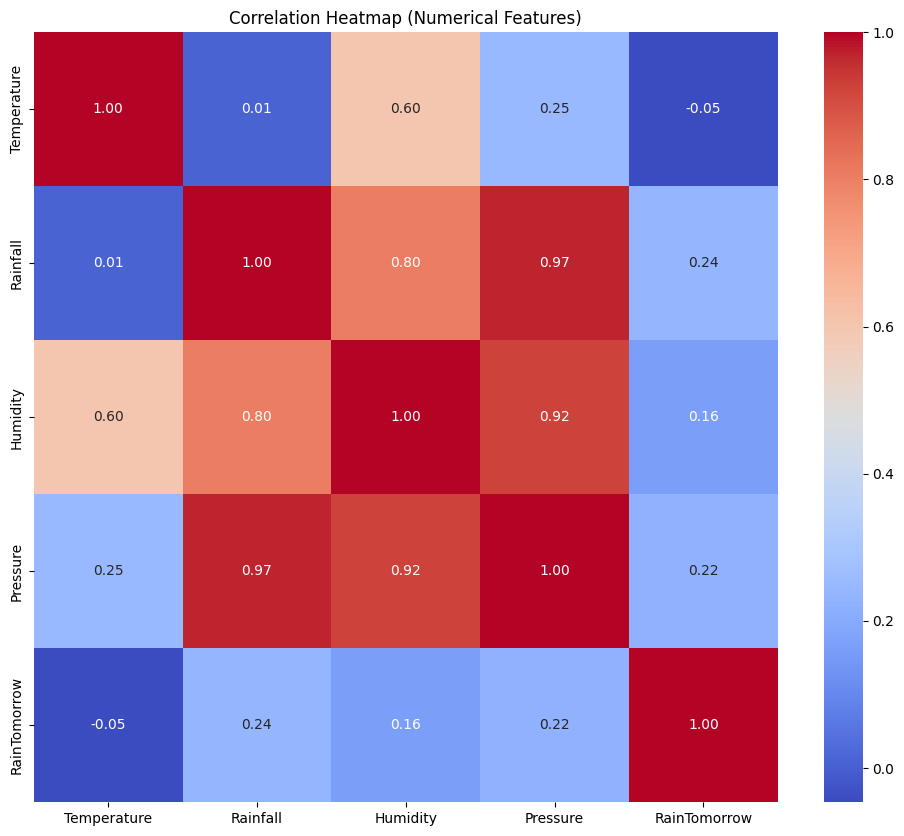

In [14]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

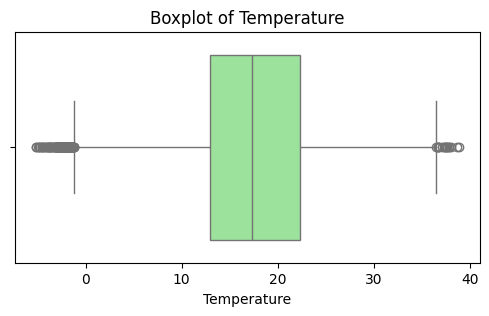

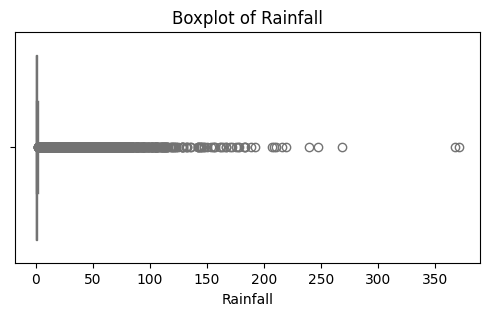

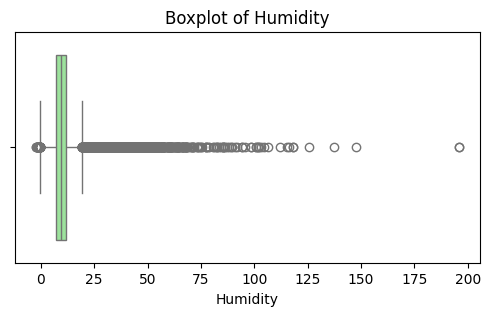

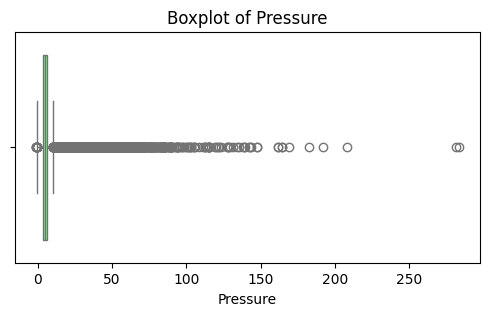

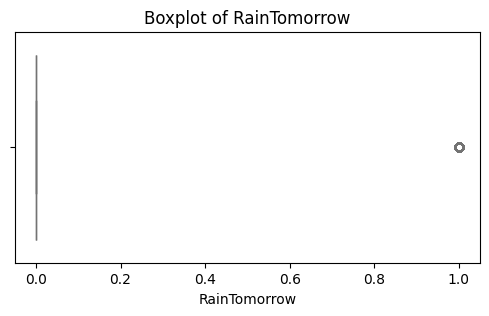

In [15]:
# 5. Boxplots for Outliers (Numerical Features)
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

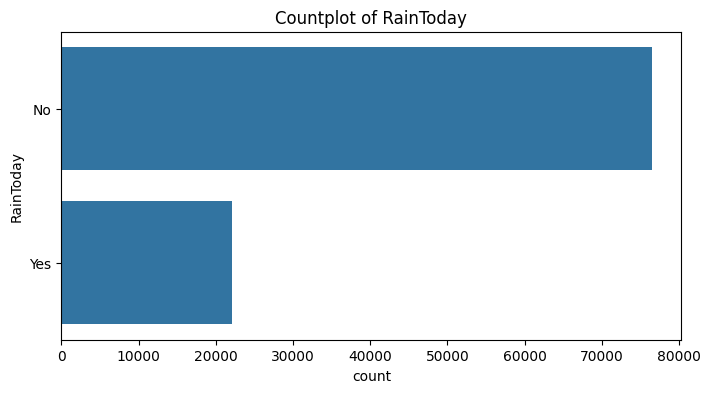

In [16]:
# 6. Bar Plots for Categorical Features
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()

# 1. Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

In [18]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [19]:
# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [20]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Results
Accuracy: 0.7919626547594886
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     15300
           1       0.61      0.20      0.30      4408

    accuracy                           0.79     19708
   macro avg       0.71      0.58      0.59     19708
weighted avg       0.76      0.79      0.75     19708



# 2. Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

In [26]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [27]:
# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [28]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Results
Accuracy: 0.768875583519383
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     15300
           1       0.46      0.22      0.29      4408

    accuracy                           0.77     19708
   macro avg       0.63      0.57      0.58     19708
weighted avg       0.73      0.77      0.73     19708



# 3. Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

In [33]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [34]:
# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [35]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [36]:
# Model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Results
Accuracy: 0.7684696569920845
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     15300
           1       0.47      0.24      0.31      4408

    accuracy                           0.77     19708
   macro avg       0.64      0.58      0.59     19708
weighted avg       0.73      0.77      0.74     19708



# 4. Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

In [39]:
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [40]:
# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])


In [41]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [44]:
print("Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Gradient Boosting Results
Accuracy: 0.792520803734524
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     15300
           1       0.62      0.19      0.29      4408

    accuracy                           0.79     19708
   macro avg       0.71      0.58      0.58     19708
weighted avg       0.76      0.79      0.75     19708



# 5. XGBoost

In [48]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
import xgboost as xgb

In [49]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [50]:
# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [51]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/chathulachandiraweerasinghe/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:59:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [55]:
print("XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))

XGBoost Results
Accuracy: 0.7871422772478182
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     15300
           1       0.57      0.19      0.29      4408

    accuracy                           0.79     19708
   macro avg       0.69      0.58      0.58     19708
weighted avg       0.75      0.79      0.74     19708



In [59]:
import joblib

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
reports = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    reports[name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Select the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model for future use
joblib.dump(best_model, 'best_rain_predictor.pkl')

# (Optional) Show summary table
import pandas as pd
summary_df = pd.DataFrame({'Model': list(results.keys()), 'Accuracy': list(results.values())})
print("\nModel Performance Summary:")
print(summary_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True))


Logistic Regression Accuracy: 0.7920
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     15300
           1       0.61      0.20      0.30      4408

    accuracy                           0.79     19708
   macro avg       0.71      0.58      0.59     19708
weighted avg       0.76      0.79      0.75     19708


Decision Tree Accuracy: 0.7708
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     15300
           1       0.47      0.22      0.30      4408

    accuracy                           0.77     19708
   macro avg       0.64      0.57      0.58     19708
weighted avg       0.73      0.77      0.74     19708


Random Forest Accuracy: 0.7683
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     15300
           1       0.47      0.24      0.32      4408

    accuracy                           0.77     19708
   macro avg       0.64   

/Users/chathulachandiraweerasinghe/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [19:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
